<a href="https://colab.research.google.com/github/Vas1l1sa/Bioinformatics-ML-petproject/blob/main/04_C%D0%BE%D0%B7%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_ML_Bioinformatics_%2B_ML_petproject_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

from sklearn.exceptions import FitFailedWarning
warnings.simplefilter("ignore", FitFailedWarning)


### Как разделить здоровых людей и людей с гастритом на основании различий в их микробиоте кишечника?



**Будем осуществлять supervised learning для задачи классификации с использованием следующих моделей машинного обучения:**

**1.   Логистическая регрессия**

**2.   KNN**

**3.   SVM**

**4.   Базовые деревья решений**

**5.   Random forests**

**6.   Boosting и AdaBoosting**

**7.   Градиентный бустинг**






###**1. Общая подготовка данных перед машинным обучением**

In [3]:
#загрузим полученный ранее датасет
df_total = pd.read_csv('/content/drive/MyDrive/данные для петпроджекта/df_total.csv')
df_total = df_total.drop(['not_null_sum'], axis=1)


In [4]:
len(df_total)

274

In [5]:
#разделим данные на признаки и отклик

X = df_total.drop(['Index'], axis=1)
y = df_total['Index']


**В данной задаче нормировка признаков не требуется, т.к. все данные в датасете - процентное содержание того или иного вида в образце, т.е. по сути они уже отнормированы**

**Ввиду того, что датасет получился довольно маленьким, сделаем разбивку данных только на обучающую и тестовую выборки (без hold-out test set).**

**Для подбора оптимальных гиперпараметров будем применять кросс-валидацию (GridSearchCV) для тестовой выборки, т.к. от изменения разбивки данных результаты ошибок тоже будут меняться.**

In [6]:
#разделим данные на тренировочную и тестовую выборки

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


###**2. Создание модели бинарной классификации на основе алгоритма логистической регрессии**


In [7]:
#создадим модель логистической регрессии и подберем оптимальные гиперпараметры при помощи поиска по сетке и кросс-валидации

from sklearn.linear_model import LogisticRegression
test_model1 = LogisticRegression(random_state=42, max_iter=50000) #устанавливаем параметр random_state, чтобы при нескольких запусках GridSearchCV со скорректированным списком гиперпараметров результаты получались уточненными, а не совершенно новыми


In [8]:
#посмотрим информацию по гиперпараметрам этого алгоритма и на основании нее составим словарь param_grid
#help(LogisticRegression())

In [9]:
#сделаем поиск по сетке для нахождения оптимальных гиперпараметров

from sklearn.model_selection import GridSearchCV
param_grid1 = [
    {'C': [0.01, 0.05, 0.06, 0.07, 0.075, 0.078, 0.079, 0.08, 0.081, 0.082, 0.085, 0.09, 0.1, 0.12, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.2, 1.5, 1.7, 1.9, 2, 3, 5, 7, 10, 12, 15], 'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'], 'dual': [False]},
    {'C': [0.01, 0.05, 0.06, 0.07, 0.075, 0.078, 0.079, 0.08, 0.081, 0.082, 0.085, 0.09, 0.1, 0.12, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.2, 1.5, 1.7, 1.9, 2, 3, 5, 7, 10, 12, 15], 'solver': ['liblinear'], 'dual': [True, False]},
]
#разбила param_grid1 на 2 части, чтобы не выпадали ошибки при переборе некоторых комбинаций solver и dual
grid1 = GridSearchCV(test_model1, param_grid1, cv = 5, scoring='accuracy', error_score=np.nan)

grid1.fit(X_train, y_train)
grid1.best_params_
#старые гиперпараметры от LogisticRegressionCV - {'Cs': 2, 'dual': False, 'solver': 'lbfgs'}
#{'C': 0.08, 'dual': False, 'solver': 'saga'}

{'C': 0.05, 'dual': True, 'solver': 'liblinear'}

In [10]:
#создадим модель с найденными оптимальными гиперпараметрами
logistic_regression_model = LogisticRegression(C = 0.05, dual=True, solver='liblinear')
logistic_regression_model.fit(X_train, y_train)
y_pred1 = logistic_regression_model.predict(X_test)
y_pred1

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1.])

###**3. Создание модели бинарной классификации на основе алгоритма KNN**

In [11]:
#создадим модель логистической регрессии и подберем оптимальные гиперпараметры при помощи поиска по сетке и кросс-валидации
from sklearn.neighbors import KNeighborsClassifier
test_model2 = KNeighborsClassifier()

In [12]:
#help(KNeighborsClassifier)

In [13]:
#сделаем поиск по сетке для нахождения оптимальных гиперпараметров
from sklearn.model_selection import GridSearchCV

param_grid2 = {'n_neighbors': list(range(1,20))}

grid2 = GridSearchCV(test_model2, param_grid2, cv=5, scoring='accuracy')
grid2.fit(X_train, y_train)
grid2.best_params_
#{'n_neighbors': 1}

{'n_neighbors': 1}

In [14]:
#создадим модель с найденными оптимальными гиперпараметрами
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
y_pred2 = knn_model.predict(X_test)
y_pred2

array([0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0.])

###**4. Создание модели бинарной классификации на основе алгоритма SVM**

In [15]:
#создадим модель логистической регрессии и подберем оптимальные гиперпараметры при помощи поиска по сетке и кросс-валидации
from sklearn.svm import SVC
test_model3 = SVC()



In [16]:
#help(SVC)

In [17]:
#сделаем поиск по сетке для нахождения оптимальных гиперпараметров
from sklearn.model_selection import GridSearchCV

param_grid3 = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.01, 0.1, 1, 1.2, 1.4, 1.45, 1.46, 1.465, 1.47, 1.475, 1.48, 1.5, 1.52, 1.55, 1.7, 2, 5, 10, 15, 20, 25, 30]}

grid3 = GridSearchCV(test_model3, cv=5, param_grid = param_grid3, scoring='accuracy')
grid3.fit(X_train, y_train)
grid3.best_params_
#когда мы получили какое-то предварительно хорошее значение 'C', потом обязательно добавляем в список для перебора ближайшие к этому числу значения и запускаем повторный поиск по сетке
#{'C': 0.01, 'kernel': 'linear'}

{'C': 1.465, 'kernel': 'sigmoid'}

In [18]:
#создадим модель с найденными оптимальными гиперпараметрами
svm_model = SVC(C=1.465, kernel='sigmoid')
svm_model.fit(X_train, y_train)
y_pred3 = svm_model.predict(X_test)
y_pred3

array([0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1.])

###**5. Создание модели бинарной классификации на основе алгоритма базовых деревьев решений**

In [19]:
#создадим модель логистической регрессии и подберем оптимальные гиперпараметры при помощи поиска по сетке и кросс-валидации
from sklearn.tree import DecisionTreeClassifier
test_model4 = DecisionTreeClassifier(random_state=42) #устанавливаем параметр random_state, чтобы при нескольких запусках GridSearchCV со скорректированным списком гиперпараметров результаты получались уточненными, а не совершенно новыми


In [20]:
#help(DecisionTreeClassifier())

In [21]:
#сделаем поиск по сетке для нахождения оптимальных гиперпараметров
from sklearn.model_selection import GridSearchCV
param_grid4 = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'criterion': ["gini", "entropy", "log_loss"]}
grid4 = GridSearchCV(test_model4, param_grid4, cv=5, scoring='accuracy')
grid4.fit(X_train, y_train)
grid4.best_params_
#{'criterion': 'entropy', 'max_depth': 3}

{'criterion': 'gini', 'max_depth': 2}

In [22]:
#создадим модель с найденными оптимальными гиперпараметрами
decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth=2)
decision_tree_model.fit(X_train, y_train)
y_pred4 = decision_tree_model.predict(X_test)
y_pred4

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1.])

###**6. Создание модели бинарной классификации на основе алгоритма Random forests**

In [23]:
#создадим модель логистической регрессии и подберем оптимальные гиперпараметры при помощи поиска по сетке и кросс-валидации
from sklearn.ensemble import RandomForestClassifier
test_model5 = RandomForestClassifier(random_state=42) #устанавливаем параметр random_state, чтобы при нескольких запусках GridSearchCV со скорректированным списком гиперпараметров результаты получались уточненными, а не совершенно новыми

In [24]:
#help(RandomForestClassifier())

In [25]:
#сделаем поиск по сетке для нахождения оптимальных гиперпараметров
from sklearn.model_selection import GridSearchCV
param_grid5 = {'n_estimators': [5, 6, 7, 8, 9, 10, 12, 15, 20, 30, 40, 45, 50, 55, 60, 65, 70, 75, 80, 90, 100, 120, 140, 200, 300, 400, 500], 'max_features': ['sqrt', 'log2']}
grid5 = GridSearchCV(test_model5, param_grid5, cv=5, scoring='accuracy', error_score=np.nan)
grid5.fit(X_train, y_train)
grid5.best_params_
#когда мы получили какое-то предварительно хорошее значение 'n_estimators', потом обязательно добавляем в список для перебора ближайшие к этому числу значения и запускаем повторный поиск по сетке
#{'max_features': 'sqrt', 'n_estimators': 10}


{'max_features': 'sqrt', 'n_estimators': 8}

In [26]:
#создадим модель с найденными оптимальными гиперпараметрами
random_forest_model = RandomForestClassifier(max_features='sqrt', n_estimators=8)
random_forest_model.fit(X_train, y_train)
y_pred5 = random_forest_model.predict(X_test)
y_pred5

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1.])

###**7. Создание модели бинарной классификации на основе алгоритма Boosting и AdaBoosting**

In [27]:
#создадим модель логистической регрессии и подберем оптимальные гиперпараметры при помощи поиска по сетке и кросс-валидации
from sklearn.ensemble import AdaBoostClassifier
test_model6 = AdaBoostClassifier()


In [28]:
#help(AdaBoostClassifier())

In [29]:
#сделаем поиск по сетке для нахождения оптимальных гиперпараметров
from sklearn.model_selection import GridSearchCV

param_grid6 = {'n_estimators': [5, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150]}

grid6 = GridSearchCV(test_model6, param_grid6, cv=5, scoring='accuracy')
grid6.fit(X_train, y_train)
grid6.best_params_
#{'n_estimators': 30}

{'n_estimators': 10}

In [30]:
#создадим модель с найденными оптимальными гиперпараметрами
ada_boosting_model = AdaBoostClassifier(n_estimators=10)
ada_boosting_model.fit(X_train, y_train)
y_pred6 = ada_boosting_model.predict(X_test)
y_pred6

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.])

###**8. Создание модели бинарной классификации на основе алгоритма градиентного бустинга**

In [31]:
#создадим модель логистической регрессии и подберем оптимальные гиперпараметры при помощи поиска по сетке и кросс-валидации

from sklearn.ensemble import GradientBoostingClassifier
test_model7 = GradientBoostingClassifier(random_state=42) #устанавливаем параметр random_state, чтобы при нескольких запусках GridSearchCV со скорректированным списком гиперпараметров результаты получались уточненными, а не совершенно новыми


In [32]:
#help(GradientBoostingClassifier())

In [33]:
#сделаем поиск по сетке для нахождения оптимальных гиперпараметров
from sklearn.model_selection import GridSearchCV
#param_grid7 = {'n_estimators': [10, 30, 50, 90, 100, 115, 118, 119, 120, 121, 122, 125, 150], 'learning_rate': [0.0005, 0.001, 0.0015, 0.002, 0.005, 0.01], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'max_features' : ['None', 'sqrt', 'log2'], 'loss' : ['log_loss', 'exponential']}
param_grid7 = {'n_estimators': [118, 119, 120, 121, 122, 125], 'learning_rate': [0.0005, 0.001, 0.0015, 0.002], 'max_depth': [8, 9, 10, 11, 12], 'max_features' : ['log2'], 'loss' : ['exponential']}
grid7 = GridSearchCV(test_model7, param_grid7, cv=5, scoring='accuracy')
grid7.fit(X_train, y_train)
grid7.best_params_
#{'learning_rate': 0.0005,'loss': 'exponential','max_depth': 10,'max_features': 'log2','n_estimators': 118}

{'learning_rate': 0.001,
 'loss': 'exponential',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 120}

In [34]:
#создадим модель с найденными оптимальными гиперпараметрами
gradient_boosting_model = GradientBoostingClassifier(learning_rate=0.001, loss='exponential', max_depth=10, max_features='log2', n_estimators=120)
gradient_boosting_model.fit(X_train, y_train)
y_pred7 = gradient_boosting_model.predict(X_test)
y_pred7

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1.])

###**9. Напишем функцию для сравнения всех этих моделей между собой**

Evaluating model: LogisticRegression
Accuracy: 0.963855421686747


              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        43
         1.0       0.95      0.97      0.96        40

    accuracy                           0.96        83
   macro avg       0.96      0.96      0.96        83
weighted avg       0.96      0.96      0.96        83



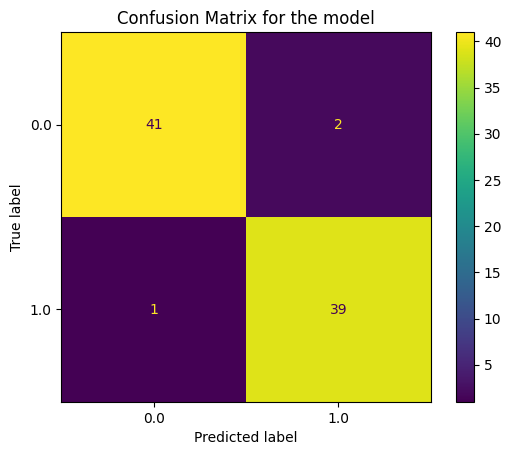



Evaluating model: KNeighborsClassifier
Accuracy: 0.9036144578313253


              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91        43
         1.0       0.97      0.82      0.89        40

    accuracy                           0.90        83
   macro avg       0.91      0.90      0.90        83
weighted avg       0.91      0.90      0.90        83



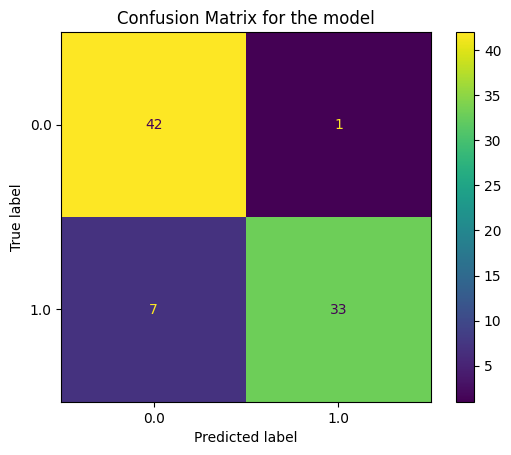



Evaluating model: SVC
Accuracy: 0.9397590361445783


              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94        43
         1.0       0.93      0.95      0.94        40

    accuracy                           0.94        83
   macro avg       0.94      0.94      0.94        83
weighted avg       0.94      0.94      0.94        83



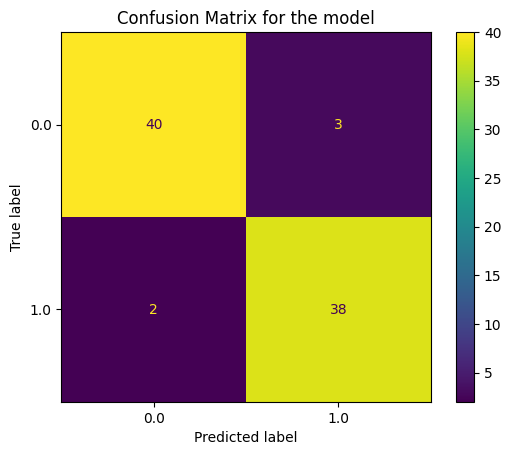



Evaluating model: DecisionTreeClassifier
Accuracy: 0.9518072289156626


              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95        43
         1.0       0.97      0.93      0.95        40

    accuracy                           0.95        83
   macro avg       0.95      0.95      0.95        83
weighted avg       0.95      0.95      0.95        83



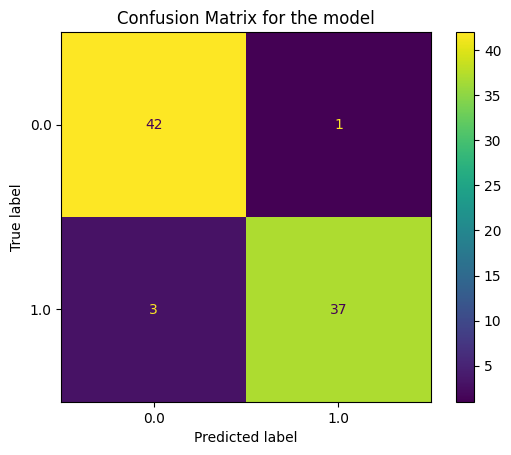



Evaluating model: RandomForestClassifier
Accuracy: 0.963855421686747


              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97        43
         1.0       1.00      0.93      0.96        40

    accuracy                           0.96        83
   macro avg       0.97      0.96      0.96        83
weighted avg       0.97      0.96      0.96        83



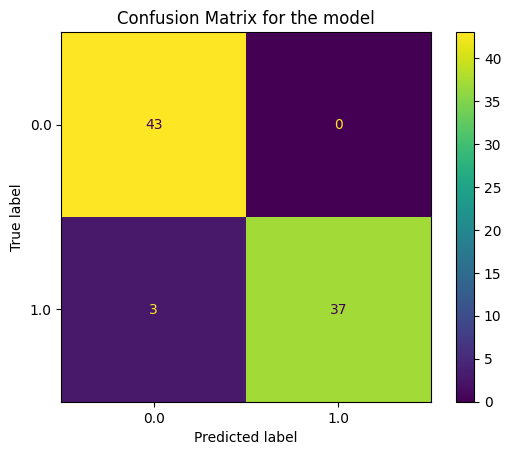



Evaluating model: AdaBoostClassifier
Accuracy: 0.963855421686747


              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97        43
         1.0       1.00      0.93      0.96        40

    accuracy                           0.96        83
   macro avg       0.97      0.96      0.96        83
weighted avg       0.97      0.96      0.96        83



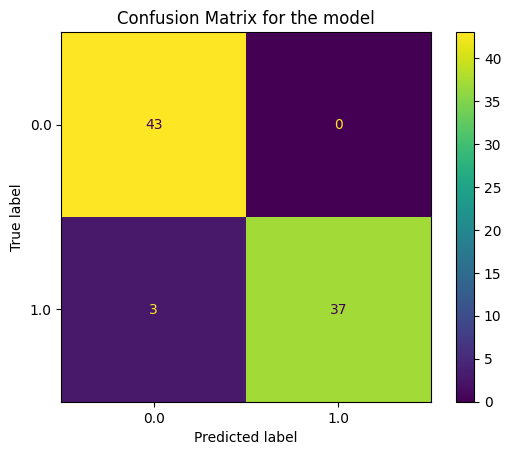



Evaluating model: GradientBoostingClassifier
Accuracy: 0.9879518072289156


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        43
         1.0       1.00      0.97      0.99        40

    accuracy                           0.99        83
   macro avg       0.99      0.99      0.99        83
weighted avg       0.99      0.99      0.99        83



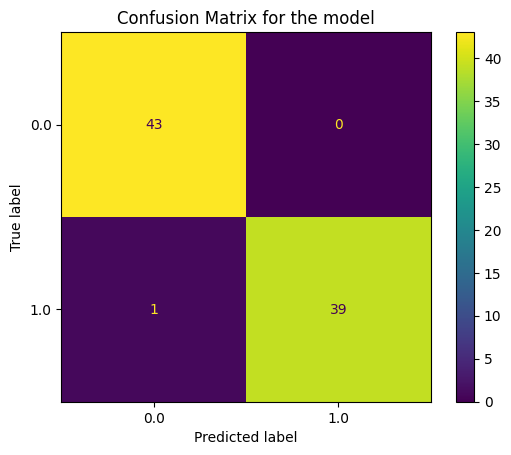

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def run_models(models, X_train, y_train, X_test, y_test):
    for model in models:
        print(f"Evaluating model: {model.__class__.__name__}")

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)


        accuracy = accuracy_score(y_test, y_pred)


        print(f'Accuracy: {accuracy}')
        print('\n')
        print(classification_report(y_test, y_pred))



        ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
        plt.title('Confusion Matrix for the model')
        plt.show()

        print('\n')


models = [logistic_regression_model, knn_model, svm_model, decision_tree_model, random_forest_model, ada_boosting_model, gradient_boosting_model]

run_models(models, X_train, y_train, X_test, y_test)


###**10. Напишем функцию для выбора наилучшей модели машинного обучения для этой задачи**

**Выберем модель, которая показала наилучшие результаты. В нашем датасете классы сбалансированы, поэтому для оценки моделей можно смотреть на показатель accuracy**

In [36]:
#посмотрим, у какой из воделей наилучшая метрика accuracy
def best_accuracy(models, X_train, y_train, X_test, y_test):
    best_accuracy = 0
    models_with_best_accuracy = []

    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            models_with_best_accuracy = [model]
        #посмотрим, нет ли моделей с одинаковым accuracy
        elif accuracy == best_accuracy:
          models_with_best_accuracy.append(model)

    print(f"Best model(s) by accuracy ({best_accuracy:}):")
    for model in models_with_best_accuracy:
        print(f" - {model.__class__.__name__}", '\n')
    return models_with_best_accuracy


models = [logistic_regression_model, knn_model, svm_model, decision_tree_model, random_forest_model, ada_boosting_model, gradient_boosting_model]
best_models = best_accuracy(models, X_train, y_train, X_test, y_test)


Best model(s) by accuracy (0.9879518072289156):
 - GradientBoostingClassifier 



**Таким образом, модель на основе GradientBoostingClassifier показала наилучшие результаты по метрике accuracy и кол-ву False Negative результатов, что особенно важно для медицинских задач.**

In [37]:
gradient_boosting_model

GradientBoostingClassifier(learning_rate=0.001, loss='exponential',
                           max_depth=10, max_features='log2', n_estimators=120)

###**12. Проверим, нет ли переобучения у нашей модели, т.к. метрики показывают довольно высокие значения**

In [38]:
#посморим на лучший средний результат accuracy на кросс-валидации на обучающей выборке для ada_boosting_model
best_cv_score = grid7.best_score_
print(f'Лучший средний результат на кросс-валидации (accuracy): {best_cv_score}')

#посморим на метрики accuracy и др. на тестовой выборке
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_test = gradient_boosting_model.predict(X_test)


test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

print(f'Точность (accuracy) на тестовой выборке: {test_accuracy}')
print(f'Точность (precision) на тестовой выборке: {test_precision}')
print(f'Полнота (recall) на тестовой выборке: {test_recall}')
print(f'F1-метрика на тестовой выборке: {test_f1}')

Лучший средний результат на кросс-валидации (accuracy): 1.0
Точность (accuracy) на тестовой выборке: 0.9879518072289156
Точность (precision) на тестовой выборке: 1.0
Полнота (recall) на тестовой выборке: 0.975
F1-метрика на тестовой выборке: 0.9873417721518988




Идеальный результат на кросс-валидации (1.0) может быть признаком того, что модель идеально обучается на фолдах кросс-валидации и имеет переобучение.

**Скорректируем гиперпараметры нашей модели**

In [52]:
#создадим модель логистической регрессии и подберем оптимальные гиперпараметры при помощи поиска по сетке и кросс-валидации

from sklearn.ensemble import GradientBoostingClassifier
test_model7_new = GradientBoostingClassifier(random_state=42) #устанавливаем параметр random_state, чтобы при нескольких запусках GridSearchCV со скорректированным списком гиперпараметров результаты получались уточненными, а не совершенно новыми


In [53]:
#сделаем поиск по сетке для нахождения оптимальных гиперпараметров
from sklearn.model_selection import GridSearchCV
param_grid7_new = {'n_estimators': [50, 60, 70, 80, 85, 87, 89, 90, 91, 92, 95, 100], 'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05], 'max_depth': [3, 4, 5, 6, 7], 'max_features' : ['sqrt'], 'loss' : ['exponential']}
grid7_new = GridSearchCV(test_model7_new, param_grid7_new, cv=5, scoring='accuracy')
grid7_new.fit(X_train, y_train)
grid7_new.best_params_
#{'learning_rate': 0.0005,'loss': 'exponential','max_depth': 10,'max_features': 'log2','n_estimators': 118}

{'learning_rate': 0.01,
 'loss': 'exponential',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 90}

In [57]:
#создадим модель с найденными оптимальными гиперпараметрами
gradient_boosting_model_new = GradientBoostingClassifier(learning_rate=0.01, loss='exponential', max_depth=4, max_features='sqrt', n_estimators=90)
gradient_boosting_model_new.fit(X_train, y_train)
y_pred7 = gradient_boosting_model_new.predict(X_test)
y_pred7

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1.])

**Построим матрицу ошибок для скорректированной модели**

Evaluating model: GradientBoostingClassifier
Accuracy: 0.9879518072289156
F1 Score: 0.9876543209876543


              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        43
         1.0       0.98      1.00      0.99        40

    accuracy                           0.99        83
   macro avg       0.99      0.99      0.99        83
weighted avg       0.99      0.99      0.99        83



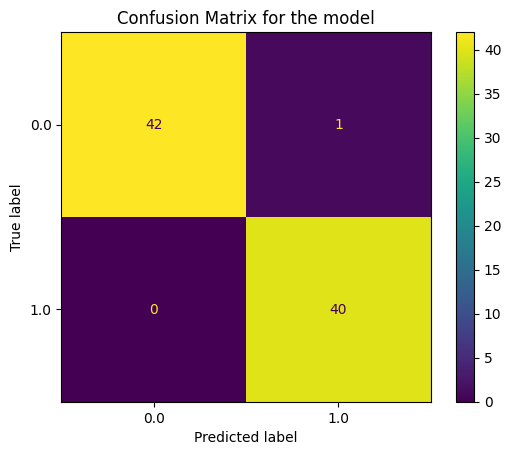

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

def run_models(models, X_train, y_train, X_test, y_test):
    for model in models:
        print(f"Evaluating model: {model.__class__.__name__}")

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)


        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='binary')

        print(f'Accuracy: {accuracy}')
        print(f'F1 Score: {f1}')
        print('\n')
        print(classification_report(y_test, y_pred))


        ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
        plt.title('Confusion Matrix for the model')
        plt.show()

        print('\n')


models = [gradient_boosting_model_new]

run_models(models, X_train, y_train, X_test, y_test)


In [64]:
#посморим на лучший средний результат accuracy на кросс-валидации на обучающей выборке для ada_boosting_model
best_cv_score = grid7_new.best_score_
print(f'Лучший средний результат на кросс-валидации (accuracy): {best_cv_score}')

#посморим на метрики accuracy и др. на тестовой выборке
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_test = gradient_boosting_model_new.predict(X_test)


test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

print(f'Точность (accuracy) на тестовой выборке: {test_accuracy}')
print(f'Точность (precision) на тестовой выборке: {test_precision}')
print(f'Полнота (recall) на тестовой выборке: {test_recall}')
print(f'F1-метрика на тестовой выборке: {test_f1}')

Лучший средний результат на кросс-валидации (accuracy): 0.9947368421052631
Точность (accuracy) на тестовой выборке: 0.9879518072289156
Точность (precision) на тестовой выборке: 0.975609756097561
Полнота (recall) на тестовой выборке: 1.0
F1-метрика на тестовой выборке: 0.9876543209876543


**Интерпретация метрик и их анализ на предмет переобучения**


Точность 0.9947368421052631 на кросс-валидации говорит о том, что модель очень хорошо обучилась на данных из обучающей выборки.

На тестовой выборке точность составляет 0.9759036144578314, а F1-метрика — 0.975, что всего лишь немного ниже, чем результаты кросс-валидации.
Precision и recall также достаточно высоки и близки к результатам на обучении. Это говорит о том, что модель не сильно потеряла в качестве на данных, которых она ранее не видела.

Обычно при переобучении модель показывает существенно лучшие результаты на кросс-валидации или обучающей выборке, чем на тестовых данных.
Здесь же расхождение метрик минимальное, что указывает на то, что модель хорошо справляется и с новыми данными.

Таким образом, переобучение, вероятно, отсутствует.
Высокие значения всех метрик указывают на хороший подбор всех гиперпараметров и хорошее обучение модели - модель можно считать хорошо настроенной.

**Найдем еще несколько метрик для оценки нашей модели**

In [44]:
#найдем метрики AUC-ROC и PRC-AUC для gradient_boosting_model_new
from sklearn.metrics import roc_curve, auc, precision_recall_curve


gradient_boosting_model_new.fit(X_train, y_train)
y_probs = gradient_boosting_model_new.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

print(f"AUC-ROC: {roc_auc: }")

precision, recall, _ = precision_recall_curve(y_test, y_probs)
prc_auc = auc(recall, precision)

print(f"PRC-AUC: {prc_auc: }")


AUC-ROC:  0.9988372093023257
PRC-AUC:  0.9987496091307069


Как мы видим по этим метрикам, модель очень хорошо справляется с задачей бинарной классификации, и вероятность ошибочной классификации (FP и FN) минимальна.

###**13. Отдельно посмотрим на данные, которые модель классифицировала неверно**

In [45]:
#получим индексы ложнопредсказанных точек
y_pred = gradient_boosting_model_new.predict(X_test)
#получим массив индексов таких точек
false_predictions = np.where(y_pred != y_test)[0]
false_predictions
#найдем строки с тамики индексами в нашем датасете
false_row = df_total.iloc[false_predictions]
false_row

,Akkermansia_muciniphila,Alistipes_finegoldii,Alistipes_finegoldii/onderdonkii,Alistipes_inops,Alistipes_massiliensis,Alistipes_putredinis,Alistipes_shahii,Anaerostipes_hadrus,Bacteroides_barnesiae,Bacteroides_caccae,...,Dorea_formicigenerans,Enterococcus_azikeevi/casseliflavus/durans/faecalis/faecium/hirae/lactis/mundtii/raffinosus/ratti/rivorum/thailandicus/villorum,Fusobacterium_ulcerans/varium,Lachnoclostridium_urinimassiliense,Lactobacillus_crispatus/gasseri/helveticus/johnsonii/kefiranofaciens/paragasseri,Lactobacillus_fermentum/gasseri/reuteri/vaginalis,Lactobacillus_phage/plantarum/reuteri/salivarius,Roseburia_faecis,Weissella_cibaria/confusa/koreensis/minor,Index
21,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,2.163093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [46]:
#проверим, есть ли вообще в колонках ненулевые значения
non_zero_values = false_row.applymap(lambda x: x if x != 0 else np.nan).dropna(axis=1, how='all')
print(non_zero_values)


    Akkermansia_muciniphila  Faecalibacterium_prausnitzii  Prevotella_copri  \
21                      NaN                           NaN               NaN   
23                      NaN                           NaN               NaN   
78                 2.163093                      4.576924          2.541073   

    Fusobacterium_nucleatum  Index  
21                  1.50853    NaN  
23                  1.50853    NaN  
78                      NaN    1.0  


**Почему данный образец был ошибочно классифицирован?** Как мы видим, данная строка содержит числовые значения всего одного признака из 131, что дает слишком мало информации об исследуемом образце для корректной работы модели.

###**14. Сохраним нашу модель**

In [47]:
gastr_or_healthy_classification_model = gradient_boosting_model_new

In [48]:
#сохранение модели

from joblib import dump, load

dump(gastr_or_healthy_classification_model, '/content/drive/MyDrive/данные для петпроджекта/gastr_or_healthy_classification_model.joblib')


['/content/drive/MyDrive/данные для петпроджекта/gastr_or_healthy_classification_model.joblib']

###**15. Определим, какие виды бактерий больше всего влияют на результат классификации и на основе этой информации создадим шаблон для загрузки новых данных в нашу модель**

**Оценка корреляции признаков**





In [49]:
feature_importances = gradient_boosting_model_new.feature_importances_


feature_names = X_train.columns
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})


importances_df = importances_df.sort_values(by='Importance', ascending=False)
importances_df = importances_df.reset_index(drop=True)
print(importances_df.head(50))


                                              Feature  Importance
0                        Faecalibacterium_prausnitzii    0.234292
1                                Bacteroides_vulgatus    0.126877
2                          Bacteroides_dorei/vulgatus    0.093939
3                               Bacteroides_uniformis    0.068613
4                              Parabacteroides_merdae    0.047032
5                    Faecalibacterium_cf./prausnitzii    0.046355
6                                 Desulfovibrio_piger    0.038738
7                       Phascolarctobacterium_faecium    0.035671
8                             Akkermansia_muciniphila    0.034958
9                           Lachnospira_pectinoschiza    0.026034
10                            Collinsella_aerofaciens    0.021206
11                               Alistipes_putredinis    0.018873
12                                   Prevotella_copri    0.017631
13                            Fusobacterium_nucleatum    0.015584
14        

In [50]:
#посмотрим корреляцию признаков и отклика (какие признаки больше других влияют на отклик)

col_names = importances_df['Feature'].tolist()
col_names

['Faecalibacterium_prausnitzii',
 'Bacteroides_vulgatus',
 'Bacteroides_dorei/vulgatus',
 'Bacteroides_uniformis',
 'Parabacteroides_merdae',
 'Faecalibacterium_cf./prausnitzii',
 'Desulfovibrio_piger',
 'Phascolarctobacterium_faecium',
 'Akkermansia_muciniphila',
 'Lachnospira_pectinoschiza',
 'Collinsella_aerofaciens',
 'Alistipes_putredinis',
 'Prevotella_copri',
 'Fusobacterium_nucleatum',
 'Alistipes_finegoldii/onderdonkii',
 'Lactobacillus_ruminis',
 'Dialister_invisus',
 'Bacteroides_ovatus',
 'Bacteroides_caccae',
 'Bifidobacterium_adolescentis/faecale/stercoris',
 'Bacteroides_fragilis',
 'Sutterella_wadsworthensis',
 'Escherichia/Shigella_albertii/boydii/coli/dysenteriae/fergusonii/flexneri/marmotae/sonnei',
 'Parasutterella_excrementihominis',
 'Bacteroides_cellulosilyticus/intestinalis',
 'Parabacteroides_distasonis',
 'Bifidobacterium_catenulatum/kashiwanohense/pseudocatenulatum',
 'Holdemanella_biformis',
 'Odoribacter_splanchnicus',
 'Bacteroides_eggerthii',
 'Erysipelot

In [51]:
#создаем шаблон датафрейма, в самом начале которого располагаются самые важные поля для заполнения (они больше всего влияют на результат)
new_data = pd.DataFrame()
for i in col_names:
  new_data1 = pd.DataFrame(({i: [ ]}))
  new_data = pd.concat([new_data, new_data1], axis=1)
new_data

#сохраним датафрейм
new_data.to_excel('/content/drive/MyDrive/данные для петпроджекта/шаблон для загрузки новых данных.xlsx')
